Importing library

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, root_mean_squared_error

READING DATA

In [65]:
product_detail = pd.read_csv("product_details.csv")
store_info = pd.read_csv("store_info.csv")
supplier_info = pd.read_csv("supplier_info.csv")
weather_data = pd.read_csv("weather_data.csv")
weekly_sales = pd.read_csv("weekly_sales.csv")


# New Section

In [66]:
display(product_detail.head())

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7


STORE INFO

In [67]:
store_info.head()

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330


In [68]:
supplier_info.head()

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306


In [69]:
weather_data.head()

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1


In [70]:
weekly_sales.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46


Exploratary Data Analysis Stage 1

In [71]:
def Eda_Stage_1(data,name):
  print("="*100)
  print(f"{name} dataset information")
  print(data.info())
  print("="*100)
  print(f"{name} dataset description")
  print(data.describe())
  print("="*100)
  print(f"{name} dataset shape")
  print(data.shape)
  print("="*100)
  print(f"{name} dataset colums")
  print(data.columns)
  print("="*100)
  print(f"{name} dataset misising values")
  print(data.isna().sum())
  print("="*100)
  print(f"{name} dataset duplicate values")
  print(data.duplicated().sum())
  print("="*100)

In [72]:
Eda_Stage_1(product_detail,"product_detail")

product_detail dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
product_detail dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356.000000    10.000000
product_detail data

In [73]:
Eda_Stage_1(product_detail,"product_detail")

product_detail dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
product_detail dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356.000000    10.000000
product_detail data

In [74]:
Eda_Stage_1(supplier_info,"supplier_info")

supplier_info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Supplier_ID      10 non-null     int64 
 1   Supplier_Name    10 non-null     object
 2   Lead_Time_Days   10 non-null     int64 
 3   Supply_Capacity  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 452.0+ bytes
None
supplier_info dataset description
       Supplier_ID  Lead_Time_Days  Supply_Capacity
count     10.00000       10.000000        10.000000
mean       5.50000        2.200000     48161.200000
std        3.02765        0.632456     18121.601841
min        1.00000        1.000000     11306.000000
25%        3.25000        2.000000     38162.250000
50%        5.50000        2.000000     51262.000000
75%        7.75000        2.750000     58185.500000
max       10.00000        3.000000     71976.000000
supplier_info dataset shape
(10, 

In [75]:
Eda_Stage_1(weekly_sales,"weekly_sales")

weekly_sales dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Number       37440 non-null  object 
 1   Product_ID        37440 non-null  int64  
 2   Store_ID          37440 non-null  int64  
 3   Units_Sold        37440 non-null  int64  
 4   Marketing_Spend   37440 non-null  float64
 5   Discount_Percent  37440 non-null  int64  
 6   Wastage_Units     37440 non-null  int64  
 7   Price             37440 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB
None
weekly_sales dataset description
         Product_ID      Store_ID    Units_Sold  Marketing_Spend  \
count  37440.000000  37440.000000  37440.000000     37440.000000   
mean    1023.500000    507.000000   1642.154087       410.551195   
std       13.853584      4.320551   1166.477872       239.093420   
min     1000.0000

In [76]:
Eda_Stage_1(weather_data,"weather_data")

weather_data dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week_Number      364 non-null    object 
 1   Region           364 non-null    object 
 2   Avg_Temperature  364 non-null    float64
 3   Rainfall         364 non-null    float64
 4   Holiday_Flag     364 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB
None
weather_data dataset description
       Avg_Temperature    Rainfall  Holiday_Flag
count       364.000000  364.000000    364.000000
mean         10.015110   20.847253      0.148352
std           6.136098   10.459884      0.355937
min          -2.000000    6.600000      0.000000
25%           4.500000   12.550000      0.000000
50%           9.700000   18.600000      0.000000
75%          15.525000   27.825000      0.000000
max          22.000000   58.300000      1.000000

In [77]:
Eda_Stage_1(store_info,"store_info")

store_info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Store_ID               15 non-null     int64 
 1   Region                 15 non-null     object
 2   Store_Size             15 non-null     int64 
 3   Cold_Storage_Capacity  15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes
None
store_info dataset description
         Store_ID    Store_Size  Cold_Storage_Capacity
count   15.000000     15.000000              15.000000
mean   507.000000   5333.333333            1527.066667
std      4.472136   2894.987458             965.651628
min    500.000000   3000.000000             634.000000
25%    503.500000   3500.000000             999.500000
50%    507.000000   4000.000000            1086.000000
75%    510.500000   5000.000000            1509.500000
max    514.000000  12000.00000

Stage 2

In [78]:
product_detail["Product_Category"].value_counts()

Product_Category
Bakery       12
Meat         12
Dairy        12
Beverages    12
Name: count, dtype: int64

In [79]:
print(f"we have the total number of {len(product_detail)} product in the store")
print(f"we have the total number of {len(product_detail["Product_Category"].value_counts())}")

we have the total number of 48 product in the store
we have the total number of 4


In [80]:
print("the sales for 52 weeks is:" ,len(weekly_sales))
print(f"The total number of units sold in {len(weather_data)} days is {weekly_sales['Units_Sold'].sum():,}")
print(f"The total number of unit wasted or expired units in {len(weather_data)} days is {weekly_sales['Wastage_Units'].sum():,}")
print(f"The average number of unit sold is {weekly_sales['Units_Sold'].mean():.2f}")
print(f"The average number of unit wasted or expired units is {weekly_sales['Wastage_Units'].mean():.2f}")

the sales for 52 weeks is: 37440
The total number of units sold in 364 days is 61,482,249
The total number of unit wasted or expired units in 364 days is 4,786,490
The average number of unit sold is 1642.15
The average number of unit wasted or expired units is 127.84


Regional Store Distribution- Bar Chat

In [81]:
store_info ['Region'].value_counts()

Region
South West    4
London        3
Midlands      3
North East    2
North West    2
South East    1
Name: count, dtype: int64

Text(0, 0.5, 'Good Wastage Rate')

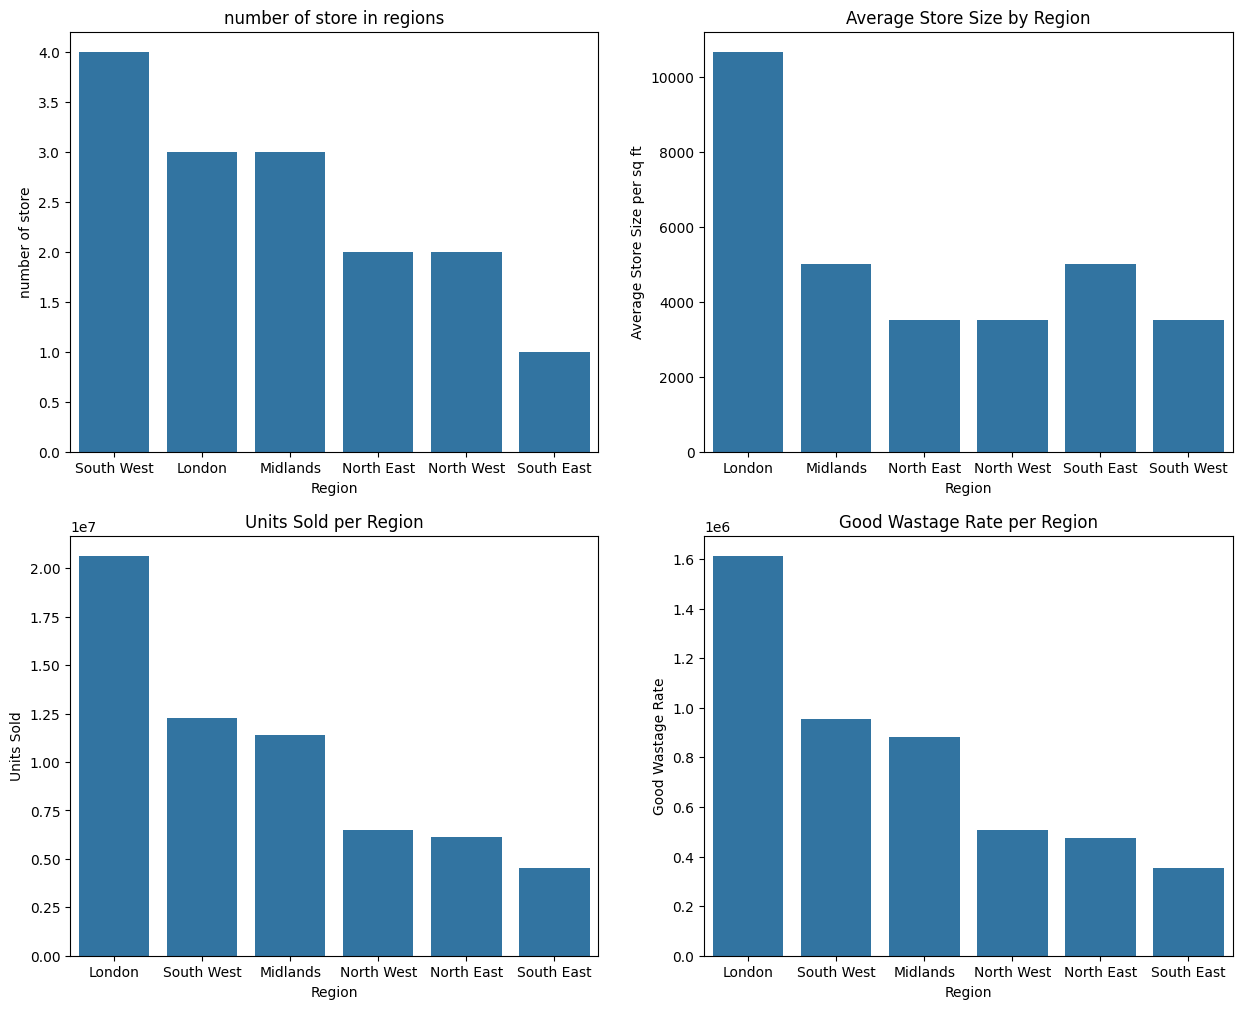

In [82]:
# sale performance by region
plt.figure(figsize=(15,12))

#total number os store per region
plt.subplot(2,2,1)
region_store_count = store_info['Region'].value_counts()
sns.barplot(x=region_store_count.index, y=region_store_count)
plt.title("number of store in regions")
plt.xlabel("Region")
plt.ylabel("number of store")

plt.subplot(2,2,2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title("Average Store Size by Region")
plt.xlabel("Region")
plt.ylabel("Average Store Size per sq ft")

#sales performance per region
plt.subplot(2,2,3)
region_sales = weekly_sales.merge(store_info, on="Store_ID")
store_region_performance = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=store_region_performance.index, y=store_region_performance.values)
plt.title("Units Sold per Region")
plt.xlabel("Region")
plt.ylabel("Units Sold")

#wastage rate per region
plt.subplot(2,2,4)
Good_wastage__by_region = region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=Good_wastage__by_region.index, y=Good_wastage__by_region.values)
plt.title("Good Wastage Rate per Region")
plt.xlabel("Region")
plt.ylabel("Good Wastage Rate")

AVERAGE PRICE PER PRODUCT ACROSS ALL CATEGORY

Discount Performance

[0 1 2 3 4 5]


C:\Users\Admin\AppData\Local\Temp\ipykernel_18596\1418167886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_per_category.index, y=price_per_category.values, palette=["blue","green", "yellow","red"])


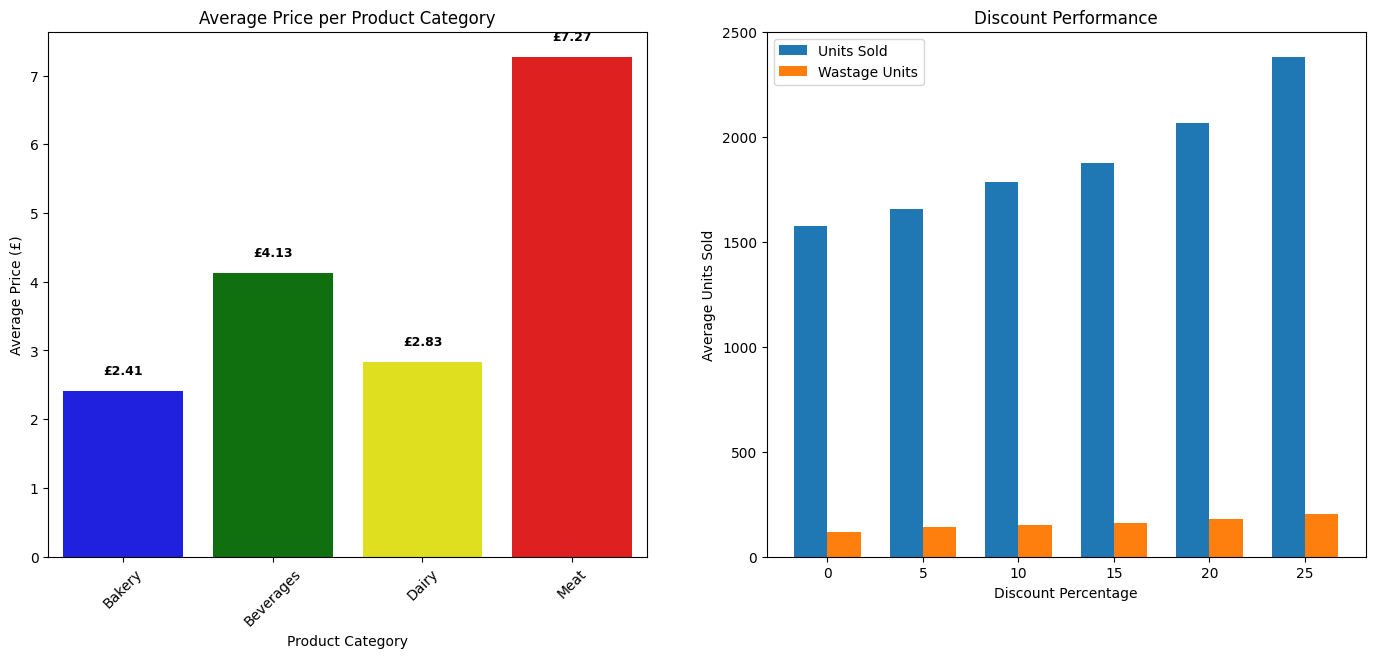

In [83]:
plt.figure(figsize=(17,15))

plt.subplot(2,2,1)
# average price per product across all category
category_price = weekly_sales.merge(product_detail, on="Product_ID")
price_per_category = category_price.groupby('Product_Category')['Price'].mean()
sns.barplot(x=price_per_category.index, y=price_per_category.values, palette=["blue","green", "yellow","red"])
plt.title("Average Price per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)

for i, (cat, val) in enumerate(zip(price_per_category.index, price_per_category.values)):
    plt.text(i, val + 0.2, f"£{val:.2f}", ha="center", va="bottom", fontweight="bold", fontsize=9)
#discount performance
# we are trying to get how the sales perform by each discount percentage
# in this plot we used aggregation, why is aggregate used

plt.subplot(2,2,2)

discount_performance = weekly_sales.groupby("Discount_Percent").agg({
    'Units_Sold':'mean','Wastage_Units': 'mean'}).reset_index()

x = np.arange(len(discount_performance))
print(x)
width = 0.35

bars1 = plt.bar(x - width/2, discount_performance['Units_Sold'], width, label='Units Sold')
bars2 = plt.bar(x + width/2, discount_performance['Wastage_Units'], width, label='Wastage Units')

plt.title("Discount Performance")
plt.xlabel("Discount Percentage")
plt.ylabel("Average Units Sold")
plt.xticks(x, discount_performance['Discount_Percent'])
plt.legend()



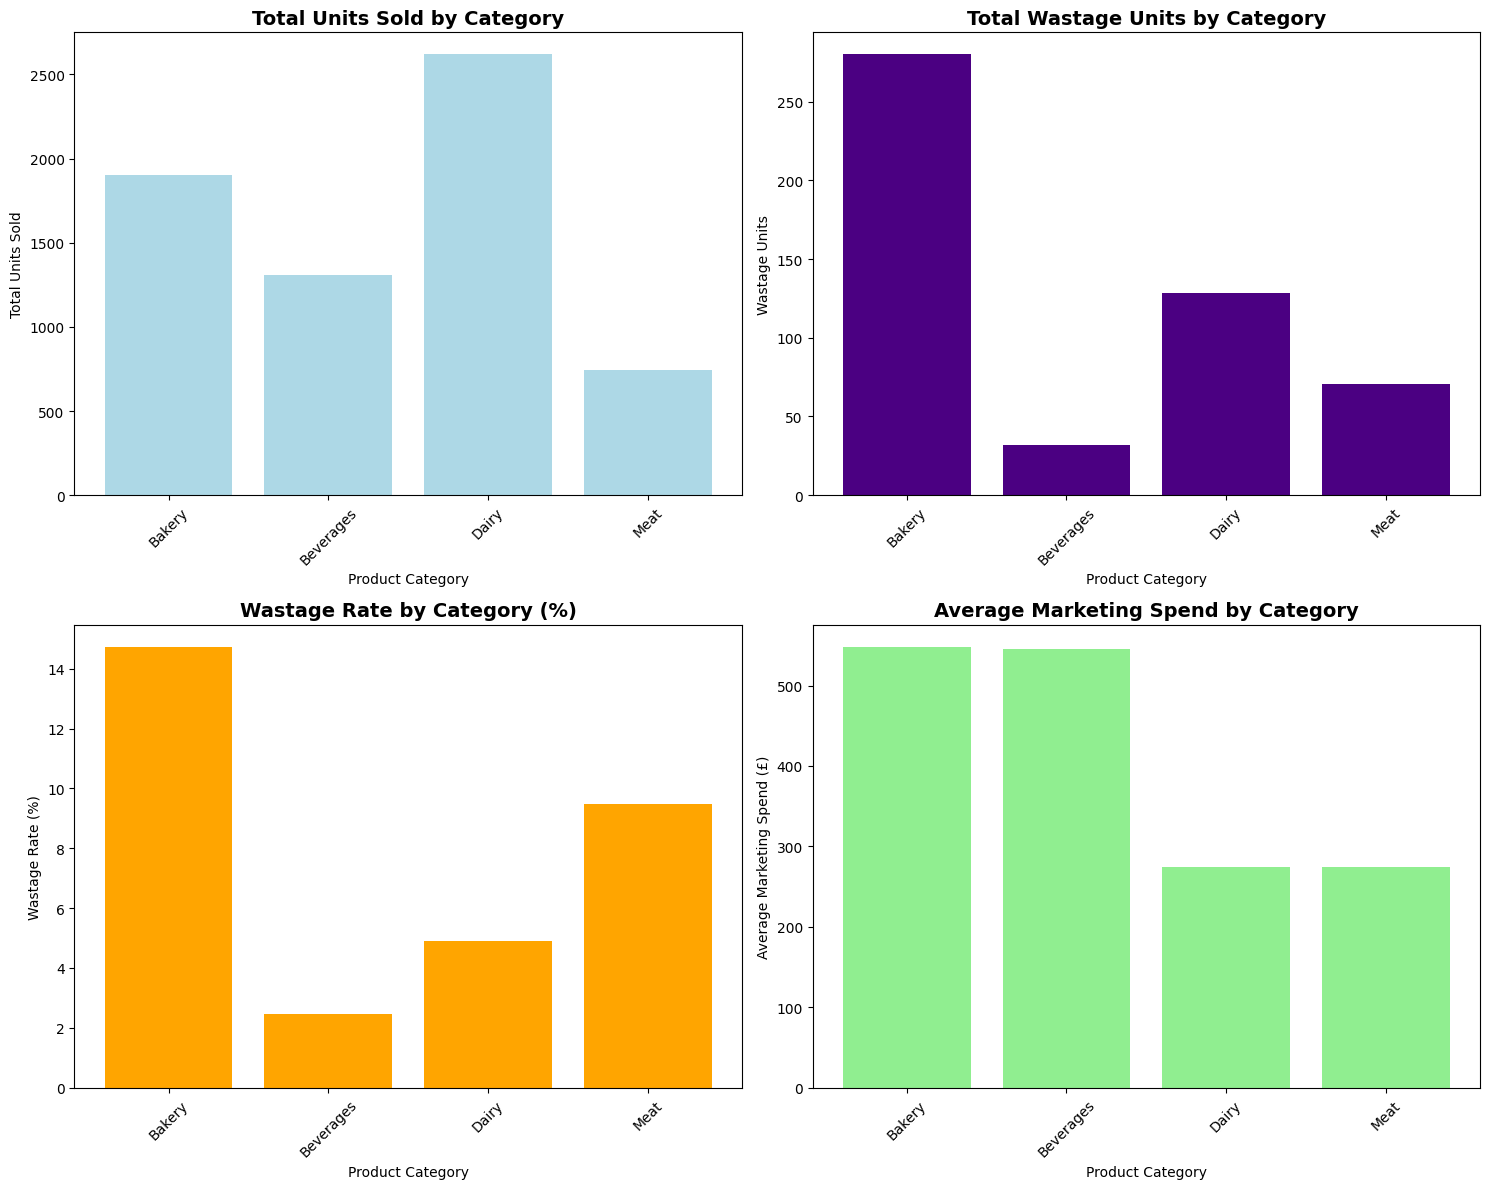

In [84]:
# cell sales performance by product Category - Comparison Bars
plt.figure(figsize=(15,12))

# merge sales with product details
sales_with_category = weekly_sales.merge(product_detail, on="Product_ID")

# calculate metrics by category
category_metrics = sales_with_category.groupby('Product_Category').agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean',
    'Price': 'mean',
    'Marketing_Spend': 'mean'
}).reset_index()

plt.subplot(2,2,1)
plt.bar(category_metrics['Product_Category'], category_metrics['Units_Sold'], color='lightblue')
plt.title('Total Units Sold by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Units'], color='indigo')
plt.title('Total Wastage Units by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Units')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
# Wastage rate Calculation
category_metrics['Wastage_Rate'] = (category_metrics['Wastage_Units'] / category_metrics['Units_Sold']) *100
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Rate'], color='orange')
plt.title('Wastage Rate by Category (%)', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.bar(category_metrics['Product_Category'], category_metrics['Marketing_Spend'], color='lightgreen')
plt.title('Average Marketing Spend by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Average Marketing Spend (£)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

SALES PERFORMANCE BY PRODUCT CATEGORY- COMPARISON BARS

Columns in merged data: ['Week_Number', 'Product_ID', 'Store_ID', 'Units_Sold', 'Marketing_Spend', 'Discount_Percent', 'Wastage_Units', 'Price', 'Product_Name', 'Product_Category', 'Shelf_Life_Days', 'Supplier_ID']


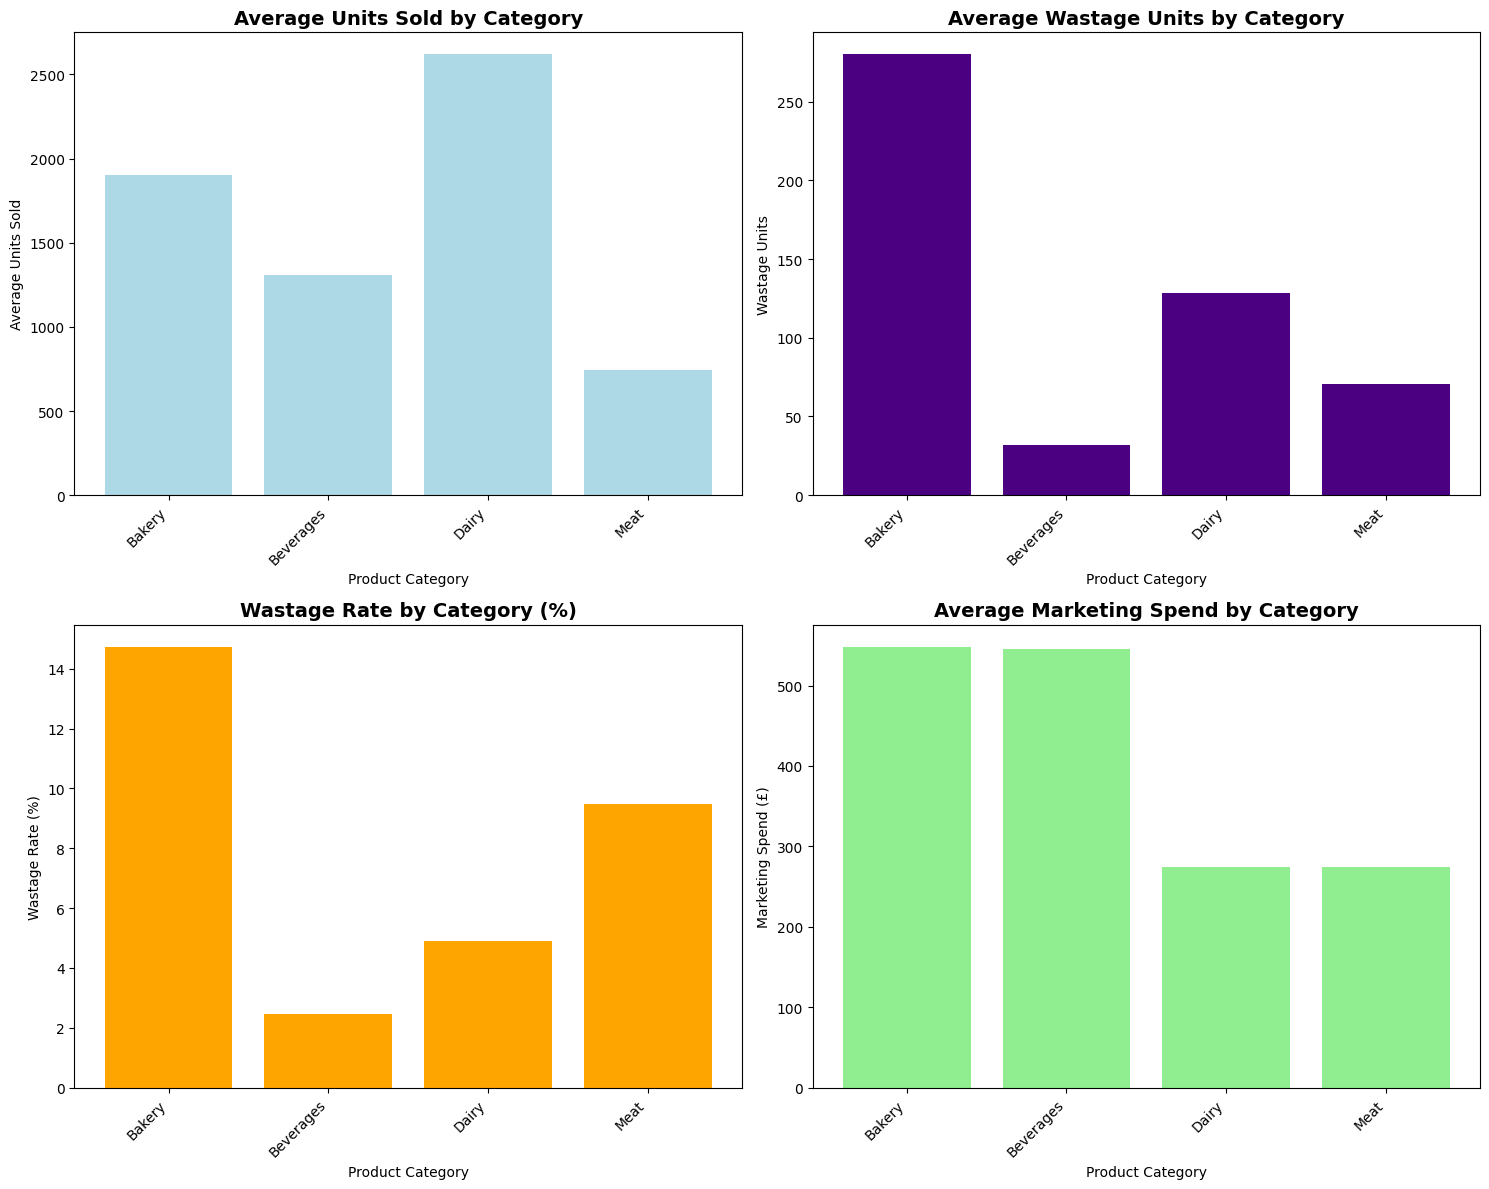

In [85]:
# Assuming you already have these loaded:
# weekly_sales (DataFrame), product_detail (DataFrame)

# 1. Merge sales with product info
sales_with_category = weekly_sales.merge(product_detail, on="Product_ID", how="left")

# 2. Check columns — if some are missing, add placeholders
print("Columns in merged data:", sales_with_category.columns.tolist())

for col in ['Units_Sold', 'Wastage_Units', 'Price', 'Marketing_Spend']:
    if col not in sales_with_category.columns:
        print(f"⚠️ Column '{col}' missing — creating placeholder zeros.")
        sales_with_category[col] = 0

# 3. Group and compute mean metrics per product category
category_metrics = sales_with_category.groupby('Product_Category').agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean',
    'Price': 'mean',
    'Marketing_Spend': 'mean'
}).reset_index()

# 4. Create 2×2 bar charts
plt.figure(figsize=(15,12))

# Units Sold
plt.subplot(2,2,1)
plt.bar(category_metrics['Product_Category'], category_metrics['Units_Sold'], color='lightblue')
plt.title('Average Units Sold by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45, ha='right')

# Wastage Units
plt.subplot(2,2,2)
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Units'], color='indigo')
plt.title('Average Wastage Units by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Units')
plt.xticks(rotation=45, ha='right')

# Wastage Rate (%)
category_metrics['Wastage_Rate'] = (
    category_metrics['Wastage_Units'] /
    category_metrics['Units_Sold'].replace(0, 1)  # avoid division by zero
) * 100

plt.subplot(2,2,3)
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Rate'], color='orange')
plt.title('Wastage Rate by Category (%)', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45, ha='right')

# Marketing Spend
plt.subplot(2,2,4)
plt.bar(category_metrics['Product_Category'], category_metrics['Marketing_Spend'], color='lightgreen')
plt.title('Average Marketing Spend by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Marketing Spend (£)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#

In [86]:
 5.#Show the summary table
print("Category metrics summary:")
display(category_metrics)


IndentationError: unexpected indent (3927393372.py, line 1)

# Task
Analyze the provided weekly sales, product details, and store information datasets to extract business insights and generate strategic recommendations, covering overall business performance, category performance, regional performance, pricing strategy, promotion effectiveness, marketing spend effectiveness, product performance, seasonal trends, and shelf life impact.

## Overall business performance

### Subtask:
Calculate and summarize total units sold, total wastage, and overall wastage rate.


**Reasoning**:
Calculate the total units sold, total wastage units, and overall wastage rate from the `weekly_sales` DataFrame and print the results.



In [ ]:
total_units_sold = weekly_sales['Units_Sold'].sum()
total_wastage_units = weekly_sales['Wastage_Units'].sum()
overall_wastage_rate = (total_wastage_units / total_units_sold) * 100

print(f"Total Units Sold: {total_units_sold:,}")
print(f"Total Wastage Units: {total_wastage_units:,}")
print(f"Overall Wastage Rate: {overall_wastage_rate:.2f}%")

Total Units Sold: 61,482,249
Total Wastage Units: 4,786,490
Overall Wastage Rate: 7.79%


## Regional Performance

### Subtask:
Compare performance across regions:
- Best sales region.
- Region with the highest wastage rate.
- Most efficient region (sales per square foot).

In [ ]:
# Merge weekly_sales with store_info to get region and store size information
sales_with_region = weekly_sales.merge(store_info, on='Store_ID')

# Calculate total units sold by region
regional_sales = sales_with_region.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)

# Calculate total wastage units by region
regional_wastage = sales_with_region.groupby('Region')['Wastage_Units'].sum()

# Calculate wastage rate by region
regional_wastage_rate = ((regional_wastage / regional_sales) * 100).sort_values(ascending=False)

# Calculate total sales per square foot by region
# First, calculate total sales per store size in each region
regional_sales_per_sqft = sales_with_region.groupby('Region').apply(lambda x: x['Units_Sold'].sum() / x['Store_Size'].sum(), include_groups=False).sort_values(ascending=False)


print("Best Sales Region:")
display(regional_sales.head(1))

print("\nRegion with Highest Wastage Rate:")
display(regional_wastage_rate.head(1))

print("\nMost Efficient Region (Sales per Square Foot):")
display(regional_sales_per_sqft.head(1))

Best Sales Region:


,Units_Sold
Region,
London,20648649



Region with Highest Wastage Rate:


,0
Region,
London,7.812627



Most Efficient Region (Sales per Square Foot):


,0
Region,
North West,0.372568


Based on the analysis of category performance:

*   **Highest Sales:** [Insert Category with Highest Sales]
*   **Highest Wastage Rate:** [Insert Category with Highest Wastage Rate]
*   **Highest Average Price:** [Insert Category with Highest Average Price]

**Category-level Insights and Risks:**

*   Categories with high sales but also high wastage rates might require better inventory management or revised pricing strategies.
*   Categories with high average prices could be contributing significantly to revenue, but their sales volume might be lower.
*   Understanding the reasons behind high wastage in certain categories (e.g., short shelf life, demand fluctuations) is crucial for reducing losses.
*   Analyzing the relationship between price, marketing spend, and sales for each category can help optimize strategies.

[Further detailed insights and risks can be added after executing the code and observing the results.]

In [ ]:
# Reload the weekly_sales DataFrame
weekly_sales = pd.read_csv("/content/weekly_sales.csv")

## Strategic Recommendations

Based on the analysis, here are some strategic recommendations:

*   **Overall Performance:** [Summarize key findings and recommendations regarding sales and wastage.]
*   **Category-Specific Strategies:** [Provide recommendations for categories with high sales, high wastage, or high prices.]
*   **Regional Focus:** [Suggest strategies for the best-performing region, region with highest wastage, and most efficient region.]
*   **Pricing and Promotion:** [Recommend pricing adjustments or promotional strategies based on the price band and discount analysis.]
*   **Marketing Optimization:** [Suggest ways to optimize marketing spend based on the correlation and cost per unit analysis.]
*   **Product Portfolio Management:** [Provide recommendations for top-performing and high-wastage products.]
*   **Seasonal Planning:** [Suggest strategies to leverage best sales months and mitigate high wastage months.]
*   **Shelf Life Management:** [Recommend strategies to reduce wastage for categories with short shelf lives.]

## Shelf Life Impact

### Subtask:
Analyze how shelf life (in days) impacts wastage.
Report:
- Category with shortest shelf life.
- Category with longest shelf life.
- Category with highest wastage due to shelf life.

In [ ]:
# Merge weekly_sales with product_detail to get shelf life information
sales_with_shelf_life = weekly_sales.merge(product_detail, on='Product_ID')

# Calculate average shelf life and total wastage by product category
shelf_life_wastage = sales_with_shelf_life.groupby('Product_Category').agg(
    Average_Shelf_Life=('Shelf_Life_Days', 'mean'),
    Total_Wastage_Units=('Wastage_Units', 'sum')
).reset_index()

# Identify category with shortest shelf life
shortest_shelf_life_category = shelf_life_wastage.loc[shelf_life_wastage['Average_Shelf_Life'].idxmin()]

print("Category with Shortest Shelf Life:")
display(shortest_shelf_life_category)

# Identify category with longest shelf life
longest_shelf_life_category = shelf_life_wastage.loc[shelf_life_wastage['Average_Shelf_Life'].idxmax()]

print("\nCategory with Longest Shelf Life:")
display(longest_shelf_life_category)

# Identify category with highest wastage due to shelf life
# This is based on total wastage units, as the task asks for "highest wastage due to shelf life"
# A more sophisticated analysis would consider wastage rate vs. shelf life.
highest_wastage_category = shelf_life_wastage.loc[shelf_life_wastage['Total_Wastage_Units'].idxmax()]

print("\nCategory with Highest Wastage (Total Units):")
display(highest_wastage_category)

Category with Shortest Shelf Life:


,0
Product_Category,Bakery
Average_Shelf_Life,3.416667
Total_Wastage_Units,2622079



Category with Longest Shelf Life:


,1
Product_Category,Beverages
Average_Shelf_Life,216.833333
Total_Wastage_Units,300994



Category with Highest Wastage (Total Units):


,0
Product_Category,Bakery
Average_Shelf_Life,3.416667
Total_Wastage_Units,2622079


## Seasonal Trends

### Subtask:
Aggregate performance by month.
Identify:
- Best sales month.
- Month with the highest wastage.
- Most efficient marketing month.

In [ ]:
# Convert 'Week_Number' to datetime to extract month
weekly_sales['Week_Start_Date'] = pd.to_datetime(weekly_sales['Week_Number'] + '-1', format='%Y-W%W-%w')
weekly_sales['Month'] = weekly_sales['Week_Start_Date'].dt.to_period('M')

# Aggregate performance by month
monthly_performance = weekly_sales.groupby('Month').agg(
    Total_Units_Sold=('Units_Sold', 'sum'),
    Total_Wastage_Units=('Wastage_Units', 'sum'),
    Total_Marketing_Spend=('Marketing_Spend', 'sum')
).reset_index()

# Calculate wastage rate by month
monthly_performance['Wastage_Rate'] = (monthly_performance['Total_Wastage_Units'] / monthly_performance['Total_Units_Sold']) * 100

# Calculate marketing efficiency (Units Sold per Marketing Spend)
monthly_performance['Marketing_Efficiency'] = monthly_performance['Total_Units_Sold'] / monthly_performance['Total_Marketing_Spend']


print("Monthly Performance Summary:")
display(monthly_performance)

print("\nBest Sales Month:")
display(monthly_performance.loc[monthly_performance['Total_Units_Sold'].idxmax()])

print("\nMonth with Highest Wastage:")
display(monthly_performance.loc[monthly_performance['Total_Wastage_Units'].idxmax()])

print("\nMost Efficient Marketing Month:")
display(monthly_performance.loc[monthly_performance['Marketing_Efficiency'].idxmax()])

Monthly Performance Summary:


,Month,Total_Units_Sold,Total_Wastage_Units,Total_Marketing_Spend,Wastage_Rate,Marketing_Efficiency
0,2024-01,6504602,543425,1598882.19,8.354470,4.068218
1,2024-02,4779449,403577,1083026.99,8.444007,4.413047
2,2024-03,5043509,443252,1341693.44,8.788564,3.759062
3,2024-04,5872254,497656,1354092.99,8.474702,4.336670
4,2024-05,4494979,369459,1067142.05,8.219371,4.212166
5,2024-06,4651312,363611,1346479.63,7.817386,3.454424
6,2024-07,5550597,406817,1351689.33,7.329248,4.106415
7,2024-08,4381436,302190,1076318.53,6.897054,4.070761
8,2024-09,5540003,375388,1353303.20,6.775953,4.093689
9,2024-10,4618961,316185,1081362.87,6.845371,4.271426



Best Sales Month:


,0
Month,2024-01
Total_Units_Sold,6504602
Total_Wastage_Units,543425
Total_Marketing_Spend,1598882.19
Wastage_Rate,8.35447
Marketing_Efficiency,4.068218



Month with Highest Wastage:


,0
Month,2024-01
Total_Units_Sold,6504602
Total_Wastage_Units,543425
Total_Marketing_Spend,1598882.19
Wastage_Rate,8.35447
Marketing_Efficiency,4.068218



Most Efficient Marketing Month:


,1
Month,2024-02
Total_Units_Sold,4779449
Total_Wastage_Units,403577
Total_Marketing_Spend,1083026.99
Wastage_Rate,8.444007
Marketing_Efficiency,4.413047


## Product Performance

### Subtask:
Identify the Top 5 best-selling products.
Identify the Top 5 revenue-generating products.
Highlight the Top 5 highest-wastage products (only consider products with >1,000 units sold).

In [ ]:
# Merge weekly_sales with product_detail to get product names
sales_with_product = weekly_sales.merge(product_detail, on='Product_ID')

# Calculate total units sold by product
product_sales = sales_with_product.groupby(['Product_ID', 'Product_Name'])['Units_Sold'].sum().sort_values(ascending=False)

print("Top 5 Best-Selling Products:")
display(product_sales.head())

# Calculate total revenue by product
sales_with_product['Revenue'] = sales_with_product['Units_Sold'] * sales_with_product['Price']
product_revenue = sales_with_product.groupby(['Product_ID', 'Product_Name'])['Revenue'].sum().sort_values(ascending=False)

print("\nTop 5 Revenue-Generating Products:")
display(product_revenue.head())

# Calculate total wastage units by product
product_wastage = sales_with_product.groupby(['Product_ID', 'Product_Name'])['Wastage_Units'].sum()

# Identify products with > 1000 units sold for wastage analysis
products_over_1000_sold = product_sales[product_sales > 1000].index.get_level_values('Product_ID')
wastage_of_high_sales_products = product_wastage[product_wastage.index.get_level_values('Product_ID').isin(products_over_1000_sold)].sort_values(ascending=False)

print("\nTop 5 Highest-Wastage Products (with > 1000 units sold):")
display(wastage_of_high_sales_products.head())

Top 5 Best-Selling Products:


,,Units_Sold
Product_ID,Product_Name,
1031,Mozzarella 250g,2093430
1030,Cottage Cheese 300g,2070145
1033,Single Cream 300ml,2053001
1029,Free Range Eggs 12-pack,2049192
1034,Yogurt Drinks 6-pack,2046517



Top 5 Revenue-Generating Products:


,,Revenue
Product_ID,Product_Name,
1031,Mozzarella 250g,5927783.58
1034,Yogurt Drinks 6-pack,5779538.63
1028,Butter 250g,5771307.62
1024,Whole Milk 4-pint,5761269.32
1029,Free Range Eggs 12-pack,5755945.50



Top 5 Highest-Wastage Products (with > 1000 units sold):


,,Wastage_Units
Product_ID,Product_Name,
1001,White Sandwich Loaf,229905
1011,Donuts 8-pack,229869
1002,Croissant 4-pack,228819
1009,Banana Bread Loaf,227480
1006,Cinnamon Rolls 4-pack,224051


## Marketing Spend Effectiveness

### Subtask:
Calculate the correlation between marketing spend and sales.
Estimate the average marketing cost per unit sold.

In [ ]:
# Calculate the correlation between marketing spend and sales
marketing_sales_correlation = weekly_sales['Marketing_Spend'].corr(weekly_sales['Units_Sold'])

print(f"Correlation between Marketing Spend and Units Sold: {marketing_sales_correlation:.2f}")

# Estimate the average marketing cost per unit sold
# Avoid division by zero if total units sold is 0
total_marketing_spend = weekly_sales['Marketing_Spend'].sum()
total_units_sold = weekly_sales['Units_Sold'].sum()

average_marketing_cost_per_unit = total_marketing_spend / total_units_sold if total_units_sold > 0 else 0

print(f"Average Marketing Cost per Unit Sold: £{average_marketing_cost_per_unit:.2f}")

Correlation between Marketing Spend and Units Sold: 0.04
Average Marketing Cost per Unit Sold: £0.25


## Promotion Effectiveness

### Subtask:
Analyze the relationship between discount levels and sales.
Identify which discount percentage drives the highest sales.
Compare sales at the best discount vs. no discount, and calculate the percentage sales lift.

In [ ]:
# Analyze the relationship between discount levels and sales
discount_sales = weekly_sales.groupby('Discount_Percent')['Units_Sold'].mean().reset_index()

print("Average Units Sold by Discount Percentage:")
display(discount_sales)

# Identify which discount percentage drives the highest sales
best_discount = discount_sales.loc[discount_sales['Units_Sold'].idxmax()]

print(f"\nDiscount Percentage with Highest Average Sales: {best_discount['Discount_Percent']}%")
print(f"Average Units Sold at Best Discount: {best_discount['Units_Sold']:.2f}")

# Compare sales at the best discount vs. no discount and calculate the percentage sales lift
no_discount_sales = discount_sales[discount_sales['Discount_Percent'] == 0]['Units_Sold'].values[0]

sales_lift = ((best_discount['Units_Sold'] - no_discount_sales) / no_discount_sales) * 100

print(f"\nAverage Units Sold with No Discount: {no_discount_sales:.2f}")
print(f"Sales Lift at {best_discount['Discount_Percent']}% Discount vs. No Discount: {sales_lift:.2f}%")

Average Units Sold by Discount Percentage:


,Discount_Percent,Units_Sold
0,0,1574.219077
1,5,1656.594868
2,10,1786.886767
3,15,1875.548521
4,20,2068.336656
5,25,2382.441618



Discount Percentage with Highest Average Sales: 25.0%
Average Units Sold at Best Discount: 2382.44

Average Units Sold with No Discount: 1574.22
Sales Lift at 25.0% Discount vs. No Discount: 51.34%


## Pricing Strategy Analysis

### Subtask:
Segment products into three price bands: budget (< £5), mid-range (£5–10), and premium (≥ £10).
Report the percentage distribution across these price bands.

In [ ]:
# Define price bands
def categorize_price(price):
    if price < 5:
        return 'Budget (<£5)'
    elif 5 <= price < 10:
        return 'Mid-Range (£5-10)'
    else:
        return 'Premium (≥£10)'

# Apply price banding to the weekly_sales data
weekly_sales['Price_Band'] = weekly_sales['Price'].apply(categorize_price)

# Calculate the percentage distribution across price bands
price_band_distribution = weekly_sales['Price_Band'].value_counts(normalize=True) * 100

print("Percentage Distribution Across Price Bands:")
display(price_band_distribution)

Percentage Distribution Across Price Bands:


Price_Band
Budget (<£5)         71.383547
Mid-Range (£5-10)    23.942308
Premium (≥£10)        4.674145
Name: proportion, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
print("Environment working!")


Environment working!
